# ML - Ex1
## Name : Dor Nisim
## ID : 311354328

### Preliminary Code 

In [70]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
PATH = "/content/drive/My Drive/Machine Learning/Ex1/dog.jpeg"
ITER = 10 # The Number of Iterations Per A given K

Th function loads the Centroids (according to a given K)

In [0]:
import numpy as np


def init_centroids(K):
    """
    Initializes K centroids that are to be used in K-Means on the dataset X.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Samples, where n_samples is the number of samples and n_features is the number of features.
    K : int
        The number of centroids.

    Returns
    -------
    centroids : ndarray, shape (K, n_features)
    """
    if K == 2:
        return np.asarray([[0.        , 0.        , 0.        ],
                            [0.07843137, 0.06666667, 0.09411765]])
    elif K == 4:
        return np.asarray([[0.72156863, 0.64313725, 0.54901961],
                            [0.49019608, 0.41960784, 0.33333333],
                            [0.02745098, 0.        , 0.        ],
                            [0.17254902, 0.16862745, 0.18823529]])
    elif K == 8:
        return np.asarray([[0.01568627, 0.01176471, 0.03529412],
                            [0.14509804, 0.12156863, 0.12941176],
                            [0.4745098 , 0.40784314, 0.32941176],
                            [0.00784314, 0.00392157, 0.02745098],
                            [0.50588235, 0.43529412, 0.34117647],
                            [0.09411765, 0.09019608, 0.11372549],
                            [0.54509804, 0.45882353, 0.36470588],
                            [0.44705882, 0.37647059, 0.29019608]])
    elif K == 16:
        return np.asarray([[0.61568627, 0.56078431, 0.45882353],
                            [0.4745098 , 0.38039216, 0.33333333],
                            [0.65882353, 0.57647059, 0.49411765],
                            [0.08235294, 0.07843137, 0.10196078],
                            [0.06666667, 0.03529412, 0.02352941],
                            [0.08235294, 0.07843137, 0.09803922],
                            [0.0745098 , 0.07058824, 0.09411765],
                            [0.01960784, 0.01960784, 0.02745098],
                            [0.00784314, 0.00784314, 0.01568627],
                            [0.8627451 , 0.78039216, 0.69803922],
                            [0.60784314, 0.52156863, 0.42745098],
                            [0.01960784, 0.01176471, 0.02352941],
                            [0.78431373, 0.69803922, 0.60392157],
                            [0.30196078, 0.21568627, 0.1254902 ],
                            [0.30588235, 0.2627451 , 0.24705882],
                            [0.65490196, 0.61176471, 0.50196078]])
    else:
        print('This value of K is not supported.')
        return None


The functions will read and display a given Image

In [0]:
%matplotlib inline

import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

from scipy.misc import imread

def ReadImage(path= PATH):
  # data preperation (loading, normalizing, reshaping)
  # path = 'dog.jpeg'
  A = imread(path)
  A_norm = A.astype(float) / 255.
  img_size = A_norm.shape
  X = A_norm.reshape(img_size[0] * img_size[1], img_size[2])
  return X, img_size

def DisplayImage(normImage):
  plt.imshow(normImage)
  plt.grid(False)
  plt.show()


The function is given a pixel (3 dimension) and a centroid, and will return the Euclidean distance between them

In [0]:
# The fuction will return the distance between a pixel and it's centroid
def CalculateDistance(pixel, centroid):
  diff = np.array(pixel)-centroid  # Calculating the diff between the points
  
  return np.dot(diff, diff.T);      # Returns the Euclidean ditance between the points

The function is given the ENTIRE image (X) and the set of centroids and will run a **single** epoche
According to the assositation of points, the centroid will be updated

In [0]:
def RunEpoch(X, centroids):
  indexes = [np.argmin([CalculateDistance(pixel,c) for c in centroids]) for pixel in X]  # For each Pixel we will recieve the appropriate centroid
  
  
  # For each index in the centroids
  for c_i in range(centroids.shape[0]):
    
    pointList = [X[idx] for (idx , cluster) in enumerate(indexes) if cluster == c_i]  # Getting all the pixels assostiated with the centroid
    
    for j in range(3):
      centroids[c_i, j] = np.mean([x[j] for x in pointList])       # Getting the Mean of each dimension of the centroid
      
  return centroids, indexes  # Return the new Centroids

The function prints all the centorids in a given iteration

In [0]:
def PrintCentroids(itr, centroids):
  formattedCentroid = (centroids * 100).astype(int);    # Getting the final two digits
  formattedCentroid = formattedCentroid.astype(float) / 100;  # Setting two points after the value
  
  centroidsStrings = [str(cen.tolist()).replace('0.0,', '0.,').replace('0.0]', '0.]') for cen in formattedCentroid] # Getting the list of centroids
  print("iter {}:".format(itr), ", ".join(centroidsStrings))

The function will create a new image according to the association of pixels

In [0]:
def CreateImage(X, indexs, centroids):
    newImg = np.zeros(X.shape);     # Creating a new Image
    for i in range(X.shape[0]):
      newImg[i] = centroids[indexs[i]];             # Setting the centroid as the new Pixel
    
    return newImg # Retrun the New Img

The function is runnning the Full KNN for a given __k__ and for 10 Iterations

In [0]:
# The function Runs KNN For a Given K including all the Iterations
# X - The Formatted pixel of the image
# k - The number of neighbors we observe
def RunKNN(X, k, ImgSize):
  print("k={}:".format(k))   # Printing the K
  cent = init_centroids(k)  # Getting the Intial Centroids
  
  for itr in range(ITER+1):
    PrintCentroids(itr, cent)  # Print the Centroids
    cent, indexs = RunEpoch(X, cent)   # Recalculating the centroids
    newImg = CreateImage(X, indexs, cent);    # Getting the New Img
  
  #DisplayImage(newImg.reshape(ImgSize));       # Showing the new Img
  return cent, indexs

In [0]:
import numpy as np
def AverageError(X, indexs, centroids): 
  errors = [CalculateDistance(pixel, centroids[i]) for (pixel, i) in  zip(X, indexs)] # Getting a list of errors for all the pixels
  return np.mean(errors)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

def PrintErrorPlot(K, errors):
  plt.plot(K, errors, '-ro')
  plt.xlabel('K')
  plt.ylabel('Average loss value')
  plt.show()

In [81]:
K_list = [2, 4, 8, 16]
X, ImgSize = ReadImage();     # Reading the Image of the Dog
avgError = []                 # The list of avg error for each k Value
for k in K_list:
  cent, indexs = RunKNN(X, k, ImgSize)       # Running the KNN For the given Img
  avgError.append(AverageError(X, indexs, cent))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if sys.path[0] == '':


k=2:
iter 0: [0., 0., 0.], [0.07, 0.06, 0.09]
iter 1: [0.01, 0.01, 0.01], [0.41, 0.36, 0.32]
iter 2: [0.06, 0.05, 0.06], [0.58, 0.51, 0.44]
iter 3: [0.08, 0.07, 0.07], [0.63, 0.55, 0.46]
iter 4: [0.08, 0.07, 0.08], [0.64, 0.56, 0.47]
iter 5: [0.09, 0.07, 0.08], [0.64, 0.56, 0.47]
iter 6: [0.09, 0.07, 0.08], [0.64, 0.56, 0.47]
iter 7: [0.09, 0.07, 0.08], [0.64, 0.56, 0.47]
iter 8: [0.09, 0.07, 0.08], [0.64, 0.56, 0.47]
iter 9: [0.09, 0.07, 0.08], [0.64, 0.56, 0.47]
iter 10: [0.09, 0.07, 0.08], [0.64, 0.56, 0.47]
k=4:
iter 0: [0.72, 0.64, 0.54], [0.49, 0.41, 0.33], [0.02, 0., 0.], [0.17, 0.16, 0.18]
iter 1: [0.72, 0.64, 0.55], [0.5, 0.42, 0.34], [0.03, 0.03, 0.03], [0.18, 0.16, 0.16]
iter 2: [0.72, 0.64, 0.55], [0.5, 0.43, 0.35], [0.04, 0.03, 0.04], [0.19, 0.17, 0.17]
iter 3: [0.72, 0.65, 0.55], [0.51, 0.44, 0.36], [0.04, 0.03, 0.04], [0.21, 0.18, 0.18]
iter 4: [0.72, 0.65, 0.55], [0.52, 0.44, 0.36], [0.04, 0.03, 0.04], [0.22, 0.19, 0.19]
iter 5: [0.72, 0.65, 0.55], [0.52, 0.45, 0.36], [

### Final Results

#### The Average Loss Value Chart

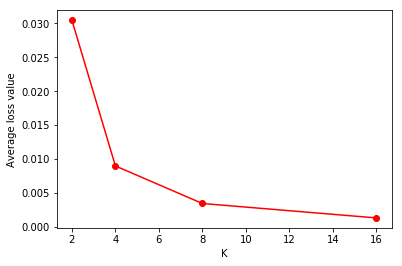

In [82]:
PrintErrorPlot(K_list, avgError)

#### The Images for each K

In [83]:
# The function Runs KNN For a Given K including all the Iterations
# X - The Formatted pixel of the image
# k - The number of neighbors we observe
def RunKNN(X, k, ImgSize):
  print("k={}:".format(k))   # Printing the K
  cent = init_centroids(k)  # Getting the Intial Centroids
  
  for itr in range(ITER+1):
    PrintCentroids(itr, cent)  # Print the Centroids
    cent, indexs = RunEpoch(X, cent)   # Recalculating the centroids
    newImg = CreateImage(X, indexs, cent);    # Getting the New Img
  
  DisplayImage(newImg.reshape(ImgSize));       # Showing the new Img
  
X, ImgSize = ReadImage();     # Reading the Image of the Dog

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if sys.path[0] == '':


##### K = 2

k=2:
iter 0: [0., 0., 0.], [0.07, 0.06, 0.09]
iter 1: [0.01, 0.01, 0.01], [0.41, 0.36, 0.32]
iter 2: [0.06, 0.05, 0.06], [0.58, 0.51, 0.44]
iter 3: [0.08, 0.07, 0.07], [0.63, 0.55, 0.46]
iter 4: [0.08, 0.07, 0.08], [0.64, 0.56, 0.47]
iter 5: [0.09, 0.07, 0.08], [0.64, 0.56, 0.47]
iter 6: [0.09, 0.07, 0.08], [0.64, 0.56, 0.47]
iter 7: [0.09, 0.07, 0.08], [0.64, 0.56, 0.47]
iter 8: [0.09, 0.07, 0.08], [0.64, 0.56, 0.47]
iter 9: [0.09, 0.07, 0.08], [0.64, 0.56, 0.47]
iter 10: [0.09, 0.07, 0.08], [0.64, 0.56, 0.47]


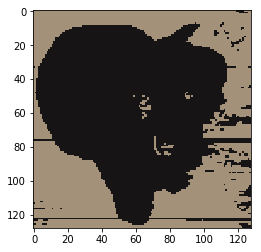

In [84]:
RunKNN(X, 2, ImgSize)       # Running the KNN For the given Img

##### K =4

k=4:
iter 0: [0.72, 0.64, 0.54], [0.49, 0.41, 0.33], [0.02, 0., 0.], [0.17, 0.16, 0.18]
iter 1: [0.72, 0.64, 0.55], [0.5, 0.42, 0.34], [0.03, 0.03, 0.03], [0.18, 0.16, 0.16]
iter 2: [0.72, 0.64, 0.55], [0.5, 0.43, 0.35], [0.04, 0.03, 0.04], [0.19, 0.17, 0.17]
iter 3: [0.72, 0.65, 0.55], [0.51, 0.44, 0.36], [0.04, 0.03, 0.04], [0.21, 0.18, 0.18]
iter 4: [0.72, 0.65, 0.55], [0.52, 0.44, 0.36], [0.04, 0.03, 0.04], [0.22, 0.19, 0.19]
iter 5: [0.72, 0.65, 0.55], [0.52, 0.45, 0.36], [0.04, 0.03, 0.04], [0.23, 0.2, 0.19]
iter 6: [0.73, 0.65, 0.56], [0.52, 0.45, 0.37], [0.04, 0.03, 0.04], [0.23, 0.2, 0.19]
iter 7: [0.73, 0.65, 0.56], [0.53, 0.45, 0.37], [0.04, 0.03, 0.04], [0.23, 0.21, 0.19]
iter 8: [0.73, 0.65, 0.56], [0.53, 0.46, 0.37], [0.04, 0.03, 0.04], [0.24, 0.21, 0.2]
iter 9: [0.73, 0.66, 0.56], [0.53, 0.46, 0.38], [0.04, 0.03, 0.04], [0.24, 0.21, 0.2]
iter 10: [0.73, 0.66, 0.56], [0.54, 0.46, 0.38], [0.04, 0.04, 0.04], [0.24, 0.21, 0.2]


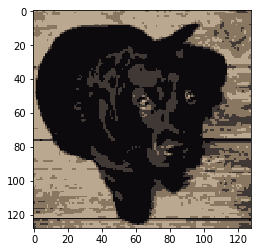

In [85]:
RunKNN(X, 4, ImgSize)       # Running the KNN For the given Img

##### K = 8

k=8:
iter 0: [0.01, 0.01, 0.03], [0.14, 0.12, 0.12], [0.47, 0.4, 0.32], [0., 0., 0.02], [0.5, 0.43, 0.34], [0.09, 0.09, 0.11], [0.54, 0.45, 0.36], [0.44, 0.37, 0.29]
iter 1: [0.03, 0.03, 0.03], [0.18, 0.17, 0.17], [0.47, 0.4, 0.32], [0., 0., 0.01], [0.5, 0.43, 0.35], [0.08, 0.07, 0.09], [0.68, 0.6, 0.51], [0.38, 0.31, 0.26]
iter 2: [0.04, 0.03, 0.04], [0.19, 0.17, 0.18], [0.46, 0.39, 0.31], [0.01, 0., 0.01], [0.54, 0.47, 0.38], [0.09, 0.08, 0.09], [0.71, 0.64, 0.54], [0.36, 0.3, 0.25]
iter 3: [0.04, 0.03, 0.04], [0.2, 0.18, 0.18], [0.46, 0.39, 0.31], [0.01, 0., 0.01], [0.57, 0.49, 0.41], [0.09, 0.08, 0.09], [0.73, 0.65, 0.56], [0.34, 0.29, 0.24]
iter 4: [0.04, 0.03, 0.04], [0.19, 0.18, 0.18], [0.46, 0.39, 0.31], [0.01, 0., 0.01], [0.59, 0.51, 0.42], [0.09, 0.09, 0.1], [0.74, 0.67, 0.57], [0.34, 0.28, 0.24]
iter 5: [0.05, 0.04, 0.05], [0.19, 0.18, 0.18], [0.47, 0.4, 0.32], [0.01, 0., 0.01], [0.6, 0.53, 0.44], [0.1, 0.09, 0.1], [0.75, 0.67, 0.58], [0.33, 0.28, 0.24]
iter 6: [0.05, 0.04, 

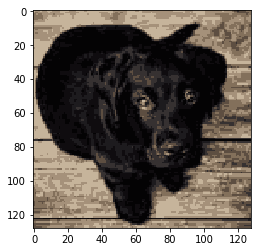

In [86]:
RunKNN(X, 8, ImgSize)       # Running the KNN For the given Img

##### K = 16

k=16:
iter 0: [0.61, 0.56, 0.45], [0.47, 0.38, 0.33], [0.65, 0.57, 0.49], [0.08, 0.07, 0.1], [0.06, 0.03, 0.02], [0.08, 0.07, 0.09], [0.07, 0.07, 0.09], [0.01, 0.01, 0.02], [0., 0., 0.01], [0.86, 0.78, 0.69], [0.6, 0.52, 0.42], [0.01, 0.01, 0.02], [0.78, 0.69, 0.6], [0.3, 0.21, 0.12], [0.3, 0.26, 0.24], [0.65, 0.61, 0.5]
iter 1: [0.62, 0.55, 0.46], [0.47, 0.39, 0.32], [0.66, 0.57, 0.48], [0.12, 0.11, 0.13], [0.06, 0.04, 0.03], [0.1, 0.08, 0.08], [0.06, 0.06, 0.07], [0.02, 0.02, 0.03], [0., 0., 0.], [0.85, 0.78, 0.69], [0.57, 0.49, 0.41], [0.02, 0.01, 0.01], [0.76, 0.69, 0.59], [0.22, 0.18, 0.16], [0.29, 0.26, 0.24], [0.69, 0.62, 0.52]
iter 2: [0.62, 0.54, 0.45], [0.46, 0.39, 0.31], [0.66, 0.58, 0.48], [0.13, 0.12, 0.14], [0.06, 0.04, 0.03], [0.1, 0.08, 0.09], [0.06, 0.06, 0.07], [0.03, 0.02, 0.04], [0., 0., 0.], [0.85, 0.78, 0.68], [0.56, 0.48, 0.4], [0.02, 0.01, 0.01], [0.76, 0.69, 0.59], [0.21, 0.18, 0.18], [0.31, 0.27, 0.24], [0.7, 0.62, 0.53]
iter 3: [0.61, 0.54, 0.45], [0.46, 0.39

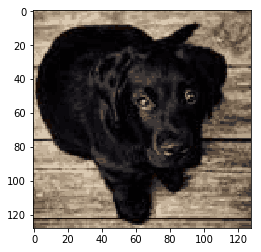

In [87]:
RunKNN(X, 16, ImgSize)       # Running the KNN For the given Img

#### The Final Code

In [2]:
import numpy as np
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

from scipy.misc import imread

PATH = "dog.jpeg"
ITER = 10 # The Number of Iterations Per A given K

def init_centroids(K):
    """
    Initializes K centroids that are to be used in K-Means on the dataset X.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Samples, where n_samples is the number of samples and n_features is the number of features.
    K : int
        The number of centroids.

    Returns
    -------
    centroids : ndarray, shape (K, n_features)
    """
    if K == 2:
        return np.asarray([[0.        , 0.        , 0.        ],
                            [0.07843137, 0.06666667, 0.09411765]])
    elif K == 4:
        return np.asarray([[0.72156863, 0.64313725, 0.54901961],
                            [0.49019608, 0.41960784, 0.33333333],
                            [0.02745098, 0.        , 0.        ],
                            [0.17254902, 0.16862745, 0.18823529]])
    elif K == 8:
        return np.asarray([[0.01568627, 0.01176471, 0.03529412],
                            [0.14509804, 0.12156863, 0.12941176],
                            [0.4745098 , 0.40784314, 0.32941176],
                            [0.00784314, 0.00392157, 0.02745098],
                            [0.50588235, 0.43529412, 0.34117647],
                            [0.09411765, 0.09019608, 0.11372549],
                            [0.54509804, 0.45882353, 0.36470588],
                            [0.44705882, 0.37647059, 0.29019608]])
    elif K == 16:
        return np.asarray([[0.61568627, 0.56078431, 0.45882353],
                            [0.4745098 , 0.38039216, 0.33333333],
                            [0.65882353, 0.57647059, 0.49411765],
                            [0.08235294, 0.07843137, 0.10196078],
                            [0.06666667, 0.03529412, 0.02352941],
                            [0.08235294, 0.07843137, 0.09803922],
                            [0.0745098 , 0.07058824, 0.09411765],
                            [0.01960784, 0.01960784, 0.02745098],
                            [0.00784314, 0.00784314, 0.01568627],
                            [0.8627451 , 0.78039216, 0.69803922],
                            [0.60784314, 0.52156863, 0.42745098],
                            [0.01960784, 0.01176471, 0.02352941],
                            [0.78431373, 0.69803922, 0.60392157],
                            [0.30196078, 0.21568627, 0.1254902 ],
                            [0.30588235, 0.2627451 , 0.24705882],
                            [0.65490196, 0.61176471, 0.50196078]])
    else:
        print('This value of K is not supported.')
        return None


def ReadImage(path= PATH):
  # data preperation (loading, normalizing, reshaping)
  # path = 'dog.jpeg'
  A = imread(path)
  A_norm = A.astype(float) / 255.
  img_size = A_norm.shape
  X = A_norm.reshape(img_size[0] * img_size[1], img_size[2])
  return X, img_size

def DisplayImage(normImage):
  plt.imshow(normImage)
  plt.grid(False)
  plt.show()
  
# The fuction will return the distance between a pixel and it's centroid
def CalculateDistance(pixel, centroid):
  diff = np.array(pixel)-centroid  # Calculating the diff between the points
  
  return np.dot(diff, diff.T);      # Returns the Euclidean ditance between the points

def RunEpoch(X, centroids):
  indexes = [np.argmin([CalculateDistance(pixel,c) for c in centroids]) for pixel in X]  # For each Pixel we will recieve the appropriate centroid
  
  
  # For each index in the centroids
  for c_i in range(centroids.shape[0]):
    
    pointList = [X[idx] for (idx , cluster) in enumerate(indexes) if cluster == c_i]  # Getting all the pixels assostiated with the centroid
    
    for j in range(3):
      centroids[c_i, j] = np.mean([x[j] for x in pointList])       # Getting the Mean of each dimension of the centroid
      
  return centroids, indexes  # Return the new Centroids

def PrintCentroids(itr, centroids):
  formattedCentroid = (centroids * 100).astype(int);    # Getting the final two digits
  formattedCentroid = formattedCentroid.astype(float) / 100;  # Setting two points after the value
  
  centroidsStrings = [str(cen.tolist()).replace('0.0,', '0.,').replace('0.0]', '0.]') for cen in formattedCentroid] # Getting the list of centroids
  print("iter {}:".format(itr), ", ".join(centroidsStrings))

def CreateImage(X, indexs, centroids):
    newImg = np.zeros(X.shape);     # Creating a new Image
    for i in range(X.shape[0]):
      newImg[i] = centroids[indexs[i]];             # Setting the centroid as the new Pixel
    
    return newImg # Retrun the New Img
	
	
# The function Runs KNN For a Given K including all the Iterations
# X - The Formatted pixel of the image
# k - The number of neighbors we observe
def RunKNN(X, k, ImgSize):
  print("k={}:".format(k))   # Printing the K
  cent = init_centroids(k)  # Getting the Intial Centroids
  
  for itr in range(ITER+1):
    PrintCentroids(itr, cent)  # Print the Centroids
    cent, indexs = RunEpoch(X, cent)   # Recalculating the centroids

  return cent, indexs
  
def main():
	K_list = [2, 4, 8, 16]
	X, ImgSize = ReadImage();     # Reading the Image of the Dog
	for k in K_list:
	  cent, indexs = RunKNN(X, k, ImgSize)       # Running the KNN For the given Img
	  
if __name__ == "__main__":
	main()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:68: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


k=2:
iter 0: [0., 0., 0.], [0.07, 0.06, 0.09]
iter 1: [0.01, 0.01, 0.01], [0.41, 0.36, 0.32]
iter 2: [0.06, 0.05, 0.06], [0.58, 0.51, 0.44]
iter 3: [0.08, 0.07, 0.07], [0.63, 0.55, 0.46]
iter 4: [0.08, 0.07, 0.08], [0.64, 0.56, 0.47]
iter 5: [0.09, 0.07, 0.08], [0.64, 0.56, 0.47]
iter 6: [0.09, 0.07, 0.08], [0.64, 0.56, 0.47]
iter 7: [0.09, 0.07, 0.08], [0.64, 0.56, 0.47]
iter 8: [0.09, 0.07, 0.08], [0.64, 0.56, 0.47]
iter 9: [0.09, 0.07, 0.08], [0.64, 0.56, 0.47]
iter 10: [0.09, 0.07, 0.08], [0.64, 0.56, 0.47]
k=4:
iter 0: [0.72, 0.64, 0.54], [0.49, 0.41, 0.33], [0.02, 0., 0.], [0.17, 0.16, 0.18]
iter 1: [0.72, 0.64, 0.55], [0.5, 0.42, 0.34], [0.03, 0.03, 0.03], [0.18, 0.16, 0.16]
iter 2: [0.72, 0.64, 0.55], [0.5, 0.43, 0.35], [0.04, 0.03, 0.04], [0.19, 0.17, 0.17]
iter 3: [0.72, 0.65, 0.55], [0.51, 0.44, 0.36], [0.04, 0.03, 0.04], [0.21, 0.18, 0.18]
iter 4: [0.72, 0.65, 0.55], [0.52, 0.44, 0.36], [0.04, 0.03, 0.04], [0.22, 0.19, 0.19]
iter 5: [0.72, 0.65, 0.55], [0.52, 0.45, 0.36], [